In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import MinMaxScaler

import IPython

from data_pipeline import DataPipeline
import model_shap

import xgboost as xgb

from memory_profiler import memory_usage

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# Load and preprocess the data
data_upac08 = DataPipeline('data/upac08')

# Track memory usage of the preprocessing
preprocessing_memory_usage = memory_usage((data_upac08._do, ()), timestamps=True)

date range: 2019-01-01 00:00:00 - 2021-04-01 23:45:00


In [3]:
# Save the memory usage to a dataframe

mem_usage = pd.DataFrame(preprocessing_memory_usage, columns=['Memory Usage', 'Timestamp'])
mem_usage.index = pd.to_datetime(mem_usage['Timestamp'], unit='s')
mem_usage = mem_usage.drop('Timestamp', axis=1)

mem_usage

,Memory Usage
Timestamp,
2023-09-13 17:32:54.242917376,241.480469
2023-09-13 17:32:54.751606272,241.511719
2023-09-13 17:32:54.866169088,276.074219
2023-09-13 17:32:54.975055360,280.054688
2023-09-13 17:32:55.084015104,283.886719
2023-09-13 17:32:55.193949696,286.859375
2023-09-13 17:32:55.302731008,281.957031
2023-09-13 17:32:55.410882560,290.703125
2023-09-13 17:32:55.521185792,283.890625


In [4]:
# Fix the seed for reproducibility

np.random.seed(42)

In [5]:
# Do the iterations until the model converges

xgb_dict = {}

FEATURES = data_upac08.train_data[0].columns
COUNTER = 0
while len(FEATURES) > 1:
    xgb_ = model_shap.XGBShap(data_upac08.train_data[0][FEATURES], data_upac08.train_data[1],
                              data_upac08.val_data[0][FEATURES], data_upac08.val_data[1],
                              data_upac08.test_data[0][FEATURES], data_upac08.test_data[1],
                              scaler=data_upac08.scaler,
                              n_trials=100, seed=42)

    xgb_.do()

    xgb_dict['It {:03d}'.format(COUNTER)] = xgb_

    FEATURES = xgb_.shap_values.abs().mean().sort_values(ascending=False)[:int(xgb_.shap_values.abs().mean().shape[0] * 0.5)].index

    COUNTER += 1

[I 2023-09-13 18:33:00,941] A new study created in memory with name: no-name-178b7c39-e941-428c-88f2-ddf8b0170102


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-09-13 18:33:05,765] Trial 0 finished with value: 0.008973790136053338 and parameters: {'n_estimators': 1904, 'max_depth': 4755, 'reg_alpha': 0.000734674002393291, 'reg_lambda': 0.0006026718993550663}. Best is trial 0 with value: 0.008973790136053338.
[I 2023-09-13 18:33:08,690] Trial 1 finished with value: 0.009933641651316445 and parameters: {'n_estimators': 822, 'max_depth': 788, 'reg_alpha': 6.750277604651747e-05, 'reg_lambda': 0.0008675143843171858}. Best is trial 0 with value: 0.008973790136053338.
[I 2023-09-13 18:33:14,348] Trial 2 finished with value: 0.009944235686955384 and parameters: {'n_estimators': 3026, 'max_depth': 3543, 'reg_alpha': 3.0378649352844424e-05, 'reg_lambda': 0.0009702107536403744}. Best is trial 0 with value: 0.008973790136053338.
[I 2023-09-13 18:33:21,779] Trial 3 finished with value: 0.009782570787453948 and parameters: {'n_estimators': 4171, 'max_depth': 1069, 'reg_alpha': 0.0001900067175350296, 'reg_lambda': 0.00019157046475489948}. Best is tri

[I 2023-09-13 18:42:14,826] A new study created in memory with name: no-name-ba80bd84-7598-4a2b-b98b-20589b62f448


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-09-13 18:42:17,862] Trial 0 finished with value: 0.008682564864250602 and parameters: {'n_estimators': 1904, 'max_depth': 4755, 'reg_alpha': 0.000734674002393291, 'reg_lambda': 0.0006026718993550663}. Best is trial 0 with value: 0.008682564864250602.
[I 2023-09-13 18:42:20,201] Trial 1 finished with value: 0.009424652206891085 and parameters: {'n_estimators': 822, 'max_depth': 788, 'reg_alpha': 6.750277604651747e-05, 'reg_lambda': 0.0008675143843171858}. Best is trial 0 with value: 0.008682564864250602.
[I 2023-09-13 18:42:25,227] Trial 2 finished with value: 0.009414103280518954 and parameters: {'n_estimators': 3026, 'max_depth': 3543, 'reg_alpha': 3.0378649352844424e-05, 'reg_lambda': 0.0009702107536403744}. Best is trial 0 with value: 0.008682564864250602.
[I 2023-09-13 18:42:30,168] Trial 3 finished with value: 0.00922041522787979 and parameters: {'n_estimators': 4171, 'max_depth': 1069, 'reg_alpha': 0.0001900067175350296, 'reg_lambda': 0.00019157046475489948}. Best is tria

[I 2023-09-13 18:51:31,676] A new study created in memory with name: no-name-52b1fd9e-a064-4817-abbf-43dd823c9600


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-09-13 18:51:34,343] Trial 0 finished with value: 0.008789107469013603 and parameters: {'n_estimators': 1904, 'max_depth': 4755, 'reg_alpha': 0.000734674002393291, 'reg_lambda': 0.0006026718993550663}. Best is trial 0 with value: 0.008789107469013603.
[I 2023-09-13 18:51:36,374] Trial 1 finished with value: 0.00932967689610586 and parameters: {'n_estimators': 822, 'max_depth': 788, 'reg_alpha': 6.750277604651747e-05, 'reg_lambda': 0.0008675143843171858}. Best is trial 0 with value: 0.008789107469013603.
[I 2023-09-13 18:51:40,019] Trial 2 finished with value: 0.009362297795774245 and parameters: {'n_estimators': 3026, 'max_depth': 3543, 'reg_alpha': 3.0378649352844424e-05, 'reg_lambda': 0.0009702107536403744}. Best is trial 0 with value: 0.008789107469013603.
[I 2023-09-13 18:51:44,549] Trial 3 finished with value: 0.009231925733992789 and parameters: {'n_estimators': 4171, 'max_depth': 1069, 'reg_alpha': 0.0001900067175350296, 'reg_lambda': 0.00019157046475489948}. Best is tria

[I 2023-09-13 18:56:59,352] A new study created in memory with name: no-name-cbf4f80f-566e-4fcc-8ff3-95581e09a787


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-09-13 18:57:01,850] Trial 0 finished with value: 0.01415737667687146 and parameters: {'n_estimators': 1904, 'max_depth': 4755, 'reg_alpha': 0.000734674002393291, 'reg_lambda': 0.0006026718993550663}. Best is trial 0 with value: 0.01415737667687146.
[I 2023-09-13 18:57:03,258] Trial 1 finished with value: 0.014635069197370149 and parameters: {'n_estimators': 822, 'max_depth': 788, 'reg_alpha': 6.750277604651747e-05, 'reg_lambda': 0.0008675143843171858}. Best is trial 0 with value: 0.01415737667687146.
[I 2023-09-13 18:57:06,262] Trial 2 finished with value: 0.014632059769115073 and parameters: {'n_estimators': 3026, 'max_depth': 3543, 'reg_alpha': 3.0378649352844424e-05, 'reg_lambda': 0.0009702107536403744}. Best is trial 0 with value: 0.01415737667687146.
[I 2023-09-13 18:57:09,959] Trial 3 finished with value: 0.014540332982819447 and parameters: {'n_estimators': 4171, 'max_depth': 1069, 'reg_alpha': 0.0001900067175350296, 'reg_lambda': 0.00019157046475489948}. Best is trial 0

In [11]:
# Check the dictionary

xgb_dict['It 003'].model_memory_usage

,Memory Usage
Timestamp,
2023-09-13 11:35:47.804410112,2366.718750
2023-09-13 11:35:48.342760192,2366.718750
2023-09-13 11:35:48.458026752,2368.058594
2023-09-13 11:35:48.570027008,2368.066406
2023-09-13 11:35:48.680027904,2368.066406
2023-09-13 11:35:48.791471104,2368.066406
2023-09-13 11:35:48.903467776,2368.089844
2023-09-13 11:35:49.015470336,2368.089844
2023-09-13 11:35:49.126469632,2368.089844


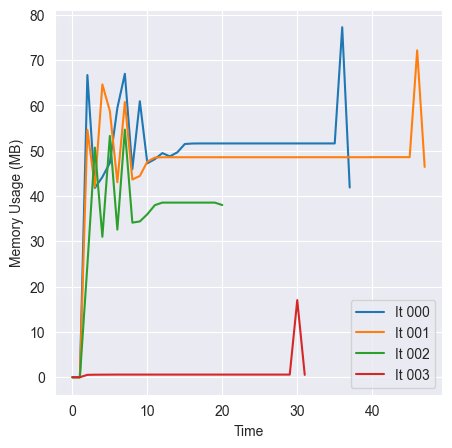

In [6]:
# Plot the memory usage of the XGBoost models

fig, ax = plt.subplots(figsize=(5, 5))

for key, value in xgb_dict.items():
    ax.plot(range(len(value.model_memory_usage)), value.model_memory_usage - value.model_memory_usage.min(), label=key)

    ax.set_ylabel('Memory Usage (MB)')

    ax.legend()

    ax.set_xlabel('Time')

plt.show()

In [12]:
# Build a report by concatenating the reports of the models

report = pd.concat([xgb_dict[key].report for key in xgb_dict.keys()], axis=0)
report.index = xgb_dict.keys()

# Append the RMSE percentage deviation from the first iteration
report['RMSE Train %'] = (report['RMSE Train'] - report['RMSE Train'][0]) / report['RMSE Train'][0] * 100
report['RMSE Val %'] = (report['RMSE Val'] - report['RMSE Val'][0]) / report['RMSE Val'][0] * 100
report['RMSE Test %'] = (report['RMSE Test'] - report['RMSE Test'][0]) / report['RMSE Test'][0] * 100

report

,RMSE Train,RMSE Val,RMSE Test,Number of Features,Avg Memory Usage,Execution Time,RMSE Train %,RMSE Val %,RMSE Test %
It 000,2.692946,420.723453,430.391068,22,49.459601,0 days 00:00:04.446873856,0.000000,0.000000,0.000000
It 001,3.149575,411.875660,436.919418,11,47.459391,0 days 00:00:05.575122944,16.956503,-2.102995,1.516842
It 002,22.655476,415.806195,440.471045,5,35.042969,0 days 00:00:02.840121600,741.289753,-1.168762,2.342051
It 003,155.529684,494.961769,482.255144,2,1.054199,0 days 00:00:03.841373952,5675.448213,17.645395,12.050454


The figure layout has changed to tight


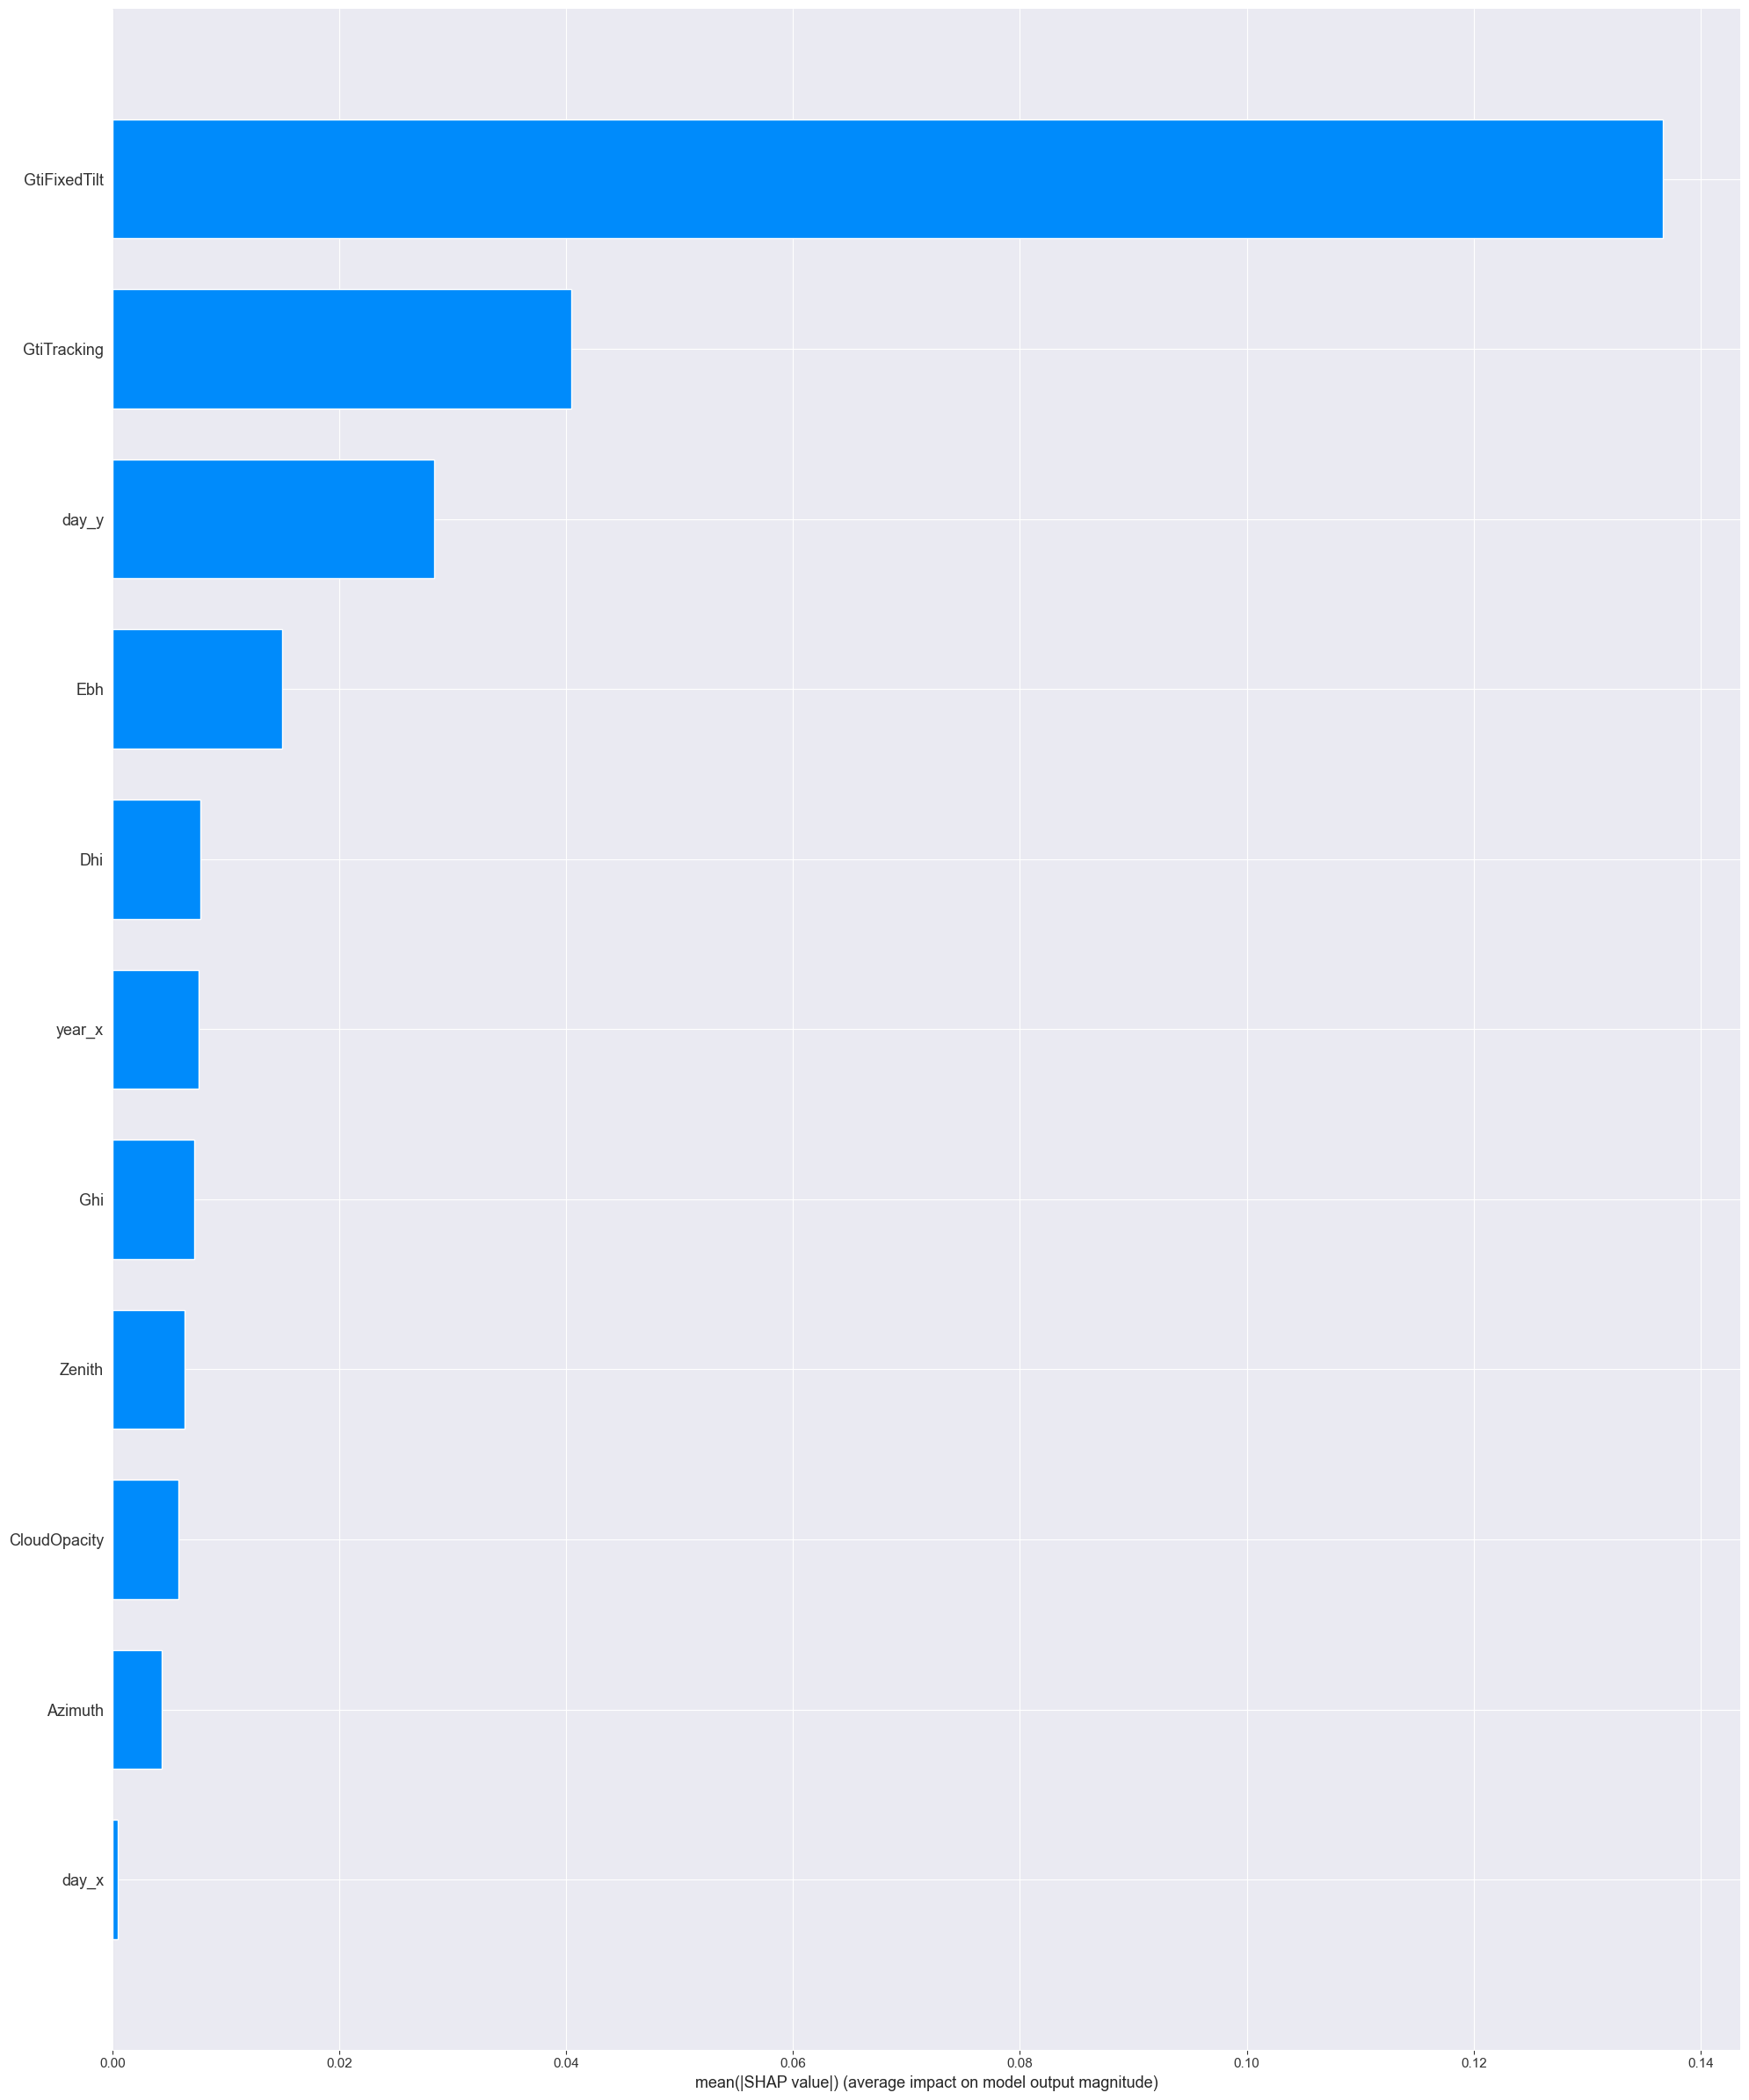

In [13]:
# Plot the mean absolute SHAP values of the first iteration

xgb_dict['It 001'].plot_shap(plot_type='bar')

In [22]:
# Save the values of XGBShap class to files

import pickle

for key in xgb_dict.keys():
    with open('models/xgboost/xgb_{}.pkl'.format(key), 'wb') as f:
        pickle.dump(xgb_dict[key], f)

In [7]:
# load the class

import pickle

with open('models/xgboost/xgb_overall.pkl', 'rb') as f:
    xgb_overall = pickle.load(f)

In [20]:
xgb_dict['It 001'].__dict__

{'train_x':                      GtiFixedTilt  GtiTracking     day_y  Ebh     day_x  Ghi   
 datetime_utc                                                                   
 2019-01-01 00:00:00           0.0          0.0  0.500000  0.0  1.000000  0.0  \
 2019-01-01 00:15:00           0.0          0.0  0.532702  0.0  0.998929  0.0   
 2019-01-01 00:30:00           0.0          0.0  0.565263  0.0  0.995722  0.0   
 2019-01-01 00:45:00           0.0          0.0  0.597545  0.0  0.990393  0.0   
 2019-01-01 01:00:00           0.0          0.0  0.629410  0.0  0.982963  0.0   
 ...                           ...          ...       ...  ...       ...  ...   
 2019-12-31 22:45:00           0.0          0.0  0.339280  0.0  0.973465  0.0   
 2019-12-31 23:00:00           0.0          0.0  0.370590  0.0  0.982963  0.0   
 2019-12-31 23:15:00           0.0          0.0  0.402455  0.0  0.990393  0.0   
 2019-12-31 23:30:00           0.0          0.0  0.434737  0.0  0.995722  0.0   
 2019-12-31 23:45